In [44]:
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#!pip install git+https://github.com/huggingface/transform
#!pip install flash-attn --no-build-isolation
#!pip install accelerate qwen-vl-utils
#!apt-get install -y poppler-utils
#!pip install colpali-engine
#!pip install qdrant-client
#!pip install streamlit
#!pip install pdf2image
#!pip install pyngrok


In [13]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [21]:
import os
os.listdir("/content/drive/MyDrive/multimodal-rag/")

['embedding.py',
 'rag.py',
 'vector_db.py',
 'multimodal-rag.ipynb',
 '__pycache__',
 'ss2.jpeg',
 'ss1.jpeg',
 'colpali',
 'Qwen']

In [15]:
%run /content/drive/MyDrive/multimodal-rag/embedding.py

In [16]:
%run /content/drive/MyDrive/multimodal-rag/vector_db.py

In [24]:
%run /content/drive/MyDrive/multimodal-rag/rag.py

In [6]:
import torch

print("CUDA Available:", torch.cuda.is_available())
print("Current Device:", torch.cuda.current_device() if torch.cuda.is_available() else "No GPU")
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")

CUDA Available: True
Current Device: 0
GPU Name: Tesla T4


In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using Device:", device)

Using Device: cuda


In [5]:
# Initialize models

from embedding import EmbedData
from vector_db import QdrantVDB_QB

# Initialize models
embedder = EmbedData()
vector_db = QdrantVDB_QB()


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
from PIL import Image

# Load images as PIL objects instead of passing file paths
image_paths = ["/content/drive/MyDrive/multimodal-rag/ss1.jpeg", "/content/drive/MyDrive/multimodal-rag/ss2.jpeg"]
images = [Image.open(img_path) for img_path in image_paths]

embedder.embed(images)  # Now passing PIL Image objects

Generating embeddings: 2it [00:05,  2.98s/it]


In [7]:
from vector_db import QdrantVDB_QB

# Initialize Qdrant vector storage
vector_db = QdrantVDB_QB(collection_name="multimodal_rag", vector_dim=128)

# Create the collection (only needs to be done once)
vector_db.create_collection()

# Store embeddings in Qdrant
vector_db.ingest_data(embedder)
print("✅ Embeddings stored in Qdrant successfully!")

Ingesting data: 1it [00:00, 43.75it/s]

✅ Embeddings stored in Qdrant successfully!


Top Retrieved Images:
1. Image ID: 0, Similarity Score: 12.487344397497264


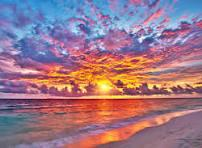

2. Image ID: 1, Similarity Score: 12.086848558638067


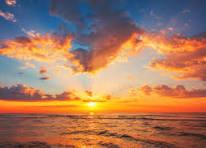

In [18]:
from vector_db import Retriever
from IPython.display import display
from io import BytesIO
import base64

# Initialize retriever
retriever = Retriever(vector_db, embedder)

# Run a query
query = "Find images of a sunset."
results = retriever.search(query)
print("Top Retrieved Images:")
for i, result in enumerate(results):  # No need for results.points
    print(f"{i+1}. Image ID: {result.id}, Similarity Score: {result.score}")
    image_data = base64.b64decode(result.payload["image"])
    retrieved_image = Image.open(BytesIO(image_data))
    display(retrieved_image)


In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.82.106.47
⠙⠹⠸⠼⠴⠦your url is: https://pretty-results-reply.loca.lt
